<font size=5><center>Assessment of air quality associated with socioeconomic status in China</center >
<br>
<font size=4><center>By Wenyuan Cui and Hao Wu</center >


# 1. Introduction

<font size=4>What is air pollution and what causes it?

Due to a rapid economic development, industrial expansion and urbanization during the last few decades in China,there has been a sharp increase in energy consumption.This staggering increase in energy consumption accompanied with lax environmental regulations has led to the release of pollutants into the air that are detrimental to human health and the planet as a whole.The increasingly occurrence of haze or smog episodes characterized by the PM2.5, PM10, sulfur dioxide (SO2), ozone (O3), carbon monoxide (CO) and nitrogen dioxide (NO2) levels and reduced visibility has been reported in national-scale China especially in the most developed and high-populated city clusters such as Beijing, Shanghai, Chengdu ,Wuhan and Kunming. Some research show that the energy consumptions keep high levels in the developed cities in China, which will accelerate the emission of air polltants such as sulfur dioxide and carbon dioxide into the air. 

<font size=4>Why the air quality analysis matters?

According to a report published earlier this year by the World Health Organisation, air pollution now kills approximately seven million people annually, worldwide. This accounts for as much as one in eight deaths, and is by far the single biggest environmental health risk. In order to  take action to clean up air in China, it’s important to first understand where the pollution is most concentrated, how it occurs, what elements are involved. By completely understanding the reasons behind air pollution, we can not only actively avoid overly contaminated areas in our daily routines but also try to implement measures to curb such pollution.

<font size=4>What benefits this project can provide to the society, organizations, or individuals.

This project can provide the insights into the air quality and pollutants with the Gross Domestic Product (GDP) and energy consumption (coal and petrol) in China. It is important for our governments and some environmental protection agencies for helping them draw up better policies and measures such as pollutant emission standard. In this way, the lifehood of the people will be improved and the risk of diabetes, heart disease, and several cancers will be reduced.

<font size=4>Major work

The major study consists (1) the occurrence length and percentage of air quality index in over three hundred Chinese cities from 2015-2017; (2) the distribution and trends of different air pollutants for major regions in four seasons; (3) the influence of different air pollutants on air quality index by regression analysis; (4) linking the air quality with the amount of energy consumed and Gross Domestic Product (GDP) through time series method; (5) predicting the trends of air quality index in the early 2018 based on past datasets. 
The overall manuscripts are organized as follows. The first part is the introduction of the air pollution in China. The second part provides the data information and analyses on descriptive statistics on the percentage and duration of different air pollutants concentration ranges. The third portion compares features such as the mean concentration, 25th and 50th percentiles, variance,etc with the change of time. At last,  the regression analysis and prediction will be performed according to extracted features from the datasets. 

# 2. Data Source and Collection

The air quality and pollutants datasets are collected from PM2.5.in (http://pm25.in/) updated daily. The data source is measured from China National Environmental Monitoring Station of the national city air quality real-time release platform.（http://www.cnemc.cn/sssj2092874.jhtml）

The time period for the data is between January 2015 to December 2017. Missing data are denoted as NA. The sample size is 450 MB.

- NO1: row number
- NO2: column number (city names)
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- PM2.5: PM2.5 concentration (mg/m^3)
- PM2.5_24h: PM2.5 concentration 24 hourly average (mg/m^3)
- PM10: PM10 concentration (mg/m^3)
- PM10_24h: PM10 concentration 24 hourly average (mg/m^3)
- AQI: air quality index real time value
- SO2: sulfur dioxide real time concentration (mg/m^3)
- SO2_24h: sulfur dioxide 24 hourly average (mg/m^3)
- NO2: nitrogen dioxide real time concentration (mg/m^3)
- NO2_24h: nitrogen dioxide 24 hourly average (mg/m^3)
- O3: ozone real time concentration (mg/m^3)
- CO: carbon monoxide real time concentration (mg/m^3)
- CO_24h: carbon monoxide 24 hourly average(mg/m^3)

The data is obtained from the websites as follows: http://beijingair.sinaapp.com/


# 3. Data manipulation

The datasets are collected on each month and the monthlyl datasets are generated into one file for 2015, 2016 and 2017.
Five target cities with the variables and datetime information are extracted from the datasets. 
Missing values are filled with the mean of the corresponding columns. 

In [1]:
# import modules
import pandas as pd
import numpy as np
import dateutil
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale

In [2]:
# The datasets are collected based on each month. Put the monthly datasets into one file called 2015.csv
# Repeat the procedure for 2016 and 2017
file_name = 'airquality2015{}.csv'
df_list=[]
for i in range(1,13):
    df_list.append(pd.read_csv(file_name.format(i)))
df = pd.concat(df_list)
df.to_csv('2015.csv')

In [3]:
# Convert the date to datetime 
dat2015 = pd.read_csv('2015.csv')
dat2015['date'] = dat2015['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [4]:
# Extract the Year, Month and Day information and put them into new columns
dat2015['year'],dat2015['month'],dat2015['day'] = dat2015['date'].dt.year,dat2015['date'].dt.month,dat2015['date'].dt.day

In [5]:
# Select the five representative Chinese cities, Date, Pollution type information 
dat2015 = dat2015[['year','month','day','hour','type','beijing','shanghai','chengdu','wuhai','kunming']]
dat2015.columns = ['Year','Month','Day','Hour','Type','Beijing','Shanghai','Chengdu','Wuhan','Kunming']
dat2015.head()

,Year,Month,Day,Hour,Type,Beijing,Shanghai,Chengdu,Wuhan,Kunming
0,2015,1,2,0,AQI,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,0,PM2.5,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,0,PM2.5_24h,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,0,PM10,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,0,PM10_24h,NaN,NaN,NaN,NaN,NaN


In [6]:
# Replace the NaN with the mean of the corresponding columns
dat2015['Beijing'] = dat2015['Beijing'].fillna((dat2015['Beijing'].mean()))
dat2015['Shanghai'] = dat2015['Shanghai'].fillna((dat2015['Shanghai'].mean()))
dat2015['Chengdu'] = dat2015['Chengdu'].fillna((dat2015['Chengdu'].mean()))
dat2015['Wuhan'] = dat2015['Wuhan'].fillna((dat2015['Wuhan'].mean()))
dat2015['Kunming'] = dat2015['Kunming'].fillna((dat2015['Kunming'].mean()))
dat2015.to_csv('2015.csv')

# 4. Data Summary and Visualization 

<font size=4>4.1 Refined dataset information

Combie 2015,2016 and 2017 datasets into one master files containing the information for further analysis. 
The master dataset is shown below containing the Year, Month, Day, Hour, air pollutant type and five major cities. 

In [7]:
# Combine 2015,2016 and 2017 datasets into one master file
dat = pd.read_csv('AirqualityMaster.csv')
dat.head()

,Year,Month,Day,Hour,Type,Beijing,Shanghai,Chengdu,Wuhan,Kunming
0,2017.0,1.0,1.0,0.0,AQI,451.0,69.0,230.0,161.0,63.0
1,2017.0,1.0,1.0,0.0,PM2.5,425.0,49.0,179.0,122.0,32.0
2,2017.0,1.0,1.0,0.0,PM2.5_24h,292.0,48.0,137.0,112.0,31.0
3,2017.0,1.0,1.0,0.0,PM10,493.0,64.0,296.0,194.0,73.0
4,2017.0,1.0,1.0,0.0,PM10_24h,343.0,70.0,228.0,163.0,69.0


The information of the dataset is presented with the data size of 27.5 MB and over 370K oberservations. 

In [8]:
# Present the information of the dataset
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378963 entries, 0 to 378962
Data columns (total 10 columns):
Year        378900 non-null float64
Month       378900 non-null float64
Day         378900 non-null float64
Hour        378900 non-null float64
Type        378900 non-null object
Beijing     378963 non-null float64
Shanghai    378963 non-null float64
Chengdu     378963 non-null float64
Wuhan       378963 non-null float64
Kunming     378963 non-null float64
dtypes: float64(9), object(1)
memory usage: 27.5+ MB


<font size=4>4.2 Air quality index (AQI) across time

Since air quality index (AQI) represents the overall air quality for each city, we conduct the statistical analysis for AQI in five cities. 
The summarized information is tabulated below. 

In [9]:
# Air Quality Index (AQI) represents the overall airquality of each city
# Summarize the AQI for the five cities from 2015-2017
dat_AQI = dat.loc[dat['Type'] == 'AQI',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_AQI.describe()

,Beijing,Shanghai,Chengdu,Wuhan,Kunming
count,25260.000000,25260.000000,25260.000000,25260.000000,25260.000000
mean,102.249029,73.785381,87.747776,89.898223,51.130273
std,80.626058,41.765729,49.484308,50.279971,19.607705
min,10.000000,13.000000,13.000000,10.000000,10.000000
25%,46.000000,45.000000,54.000000,58.000000,37.000000
50%,77.000000,62.000000,75.000000,80.000000,50.000000
75%,131.000000,89.000000,109.000000,110.000000,62.000000
max,500.000000,441.000000,430.000000,500.000000,193.000000


From the table above, it shows that Beijing has the highest AQI mean over the past three years among the five cities and its highest AQI spikes to 500. This means the air quality in Beijing is the worst among the five cities and could be harmful to people's health. However, Kunming has the lowest AQI mean of 51.13 and this indicates relative good air quality and less air pollutants. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

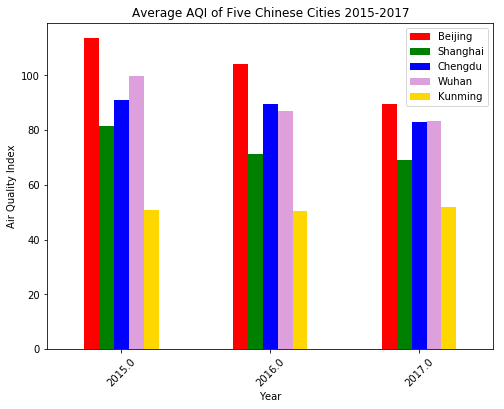

In [10]:
# Plot the trend of AQI of five cities in the past three years using bar chart
dat_AQI_Year = dat.loc[dat['Type'] == 'AQI',
                          ['Year','Beijing','Shanghai','Chengdu','Wuhan','Kunming']].groupby('Year').mean()
dat_AQI_Year.head()
dat_AQI_Year.plot(kind='bar',color = ['r','green','b','plum','gold'],figsize=(8,6),align = 'center')
plt.legend(('Beijing','Shanghai','Chengdu','Wuhan','Kunming'),bbox_to_anchor=(1, 1))
plt.title('Average AQI of Five Chinese Cities 2015-2017')
plt.xlabel('Year')
plt.ylabel('Air Quality Index')
plt.xticks(rotation=45)

The overall AQI trend is decreasing for those five cities from 2015 to 2017. It is noticed that Beijing,Wuhan and Shanghai AQI have a remarkable decline in the past three years. This is because that the governement takes action in controlling vehicle population, reducing coal consumption and improving pollutants emission standard. Kunming has maintained a relative stable AQI level over the years. The reason is that Kunming targets a tourism city and little industry is allowed to develop. 

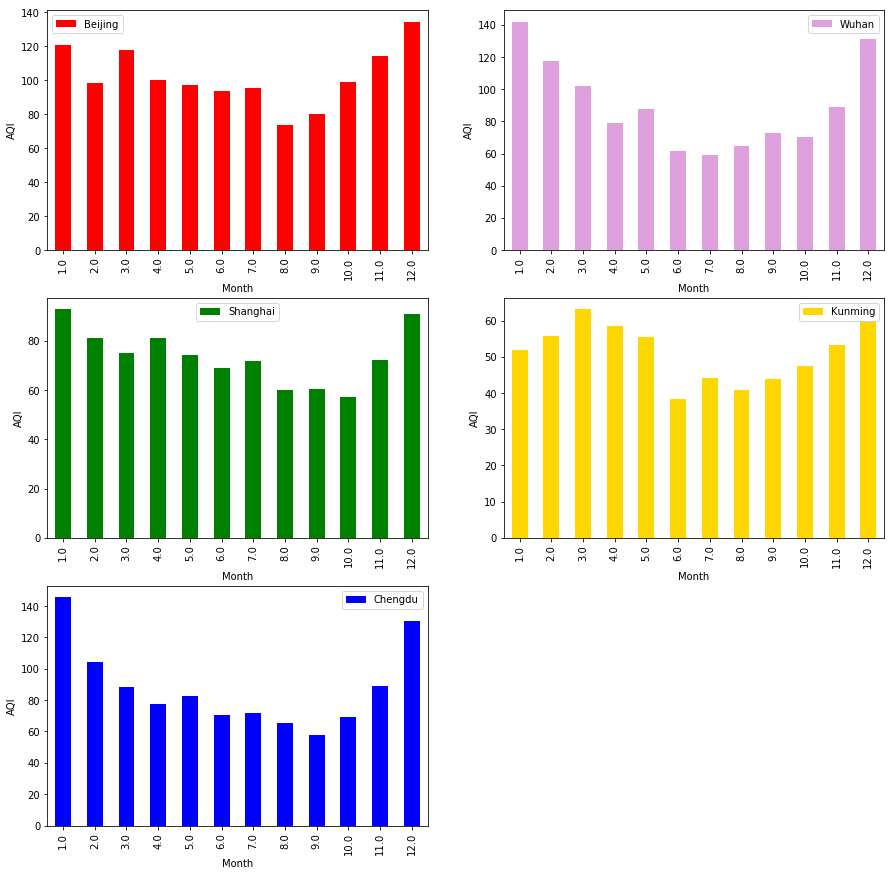

In [12]:
# AQI trend from January to December from 2015-2017
dat_AQI_Month = dat.loc[dat['Type'] == 'AQI',
                          ['Month','Beijing','Shanghai','Chengdu','Wuhan','Kunming']].groupby('Month').mean()
fig, axes = plt.subplots(3,2,figsize=(15,15))
dat_AQI_Month['Beijing'].plot(kind = 'bar',ax=axes[0,0],color='r');axes[0,0].set_ylabel('AQI');axes[0,0].legend()
dat_AQI_Month['Shanghai'].plot(kind = 'bar',ax=axes[1,0],color='g');axes[1,0].set_ylabel('AQI');axes[1,0].legend()
dat_AQI_Month['Chengdu'].plot(kind = 'bar',ax=axes[2,0],color='b');axes[2,0].set_ylabel('AQI');axes[2,0].legend()
dat_AQI_Month['Wuhan'].plot(kind = 'bar',ax=axes[0,1],color='plum');axes[0,1].set_ylabel('AQI');axes[0,1].legend()
dat_AQI_Month['Kunming'].plot(kind = 'bar',ax=axes[1,1],color='gold');axes[1,1].set_ylabel('AQI');axes[1,1].legend()
axes[2,1].set_visible(False)

It shows clear signs that five cities have the same distribution which AQI reaches higher level in winter and lower level in summer. This could be attributed to the coal consumption during the heating season in those Chinese cities. 

<font size=4>4.3 Review of PM2.5

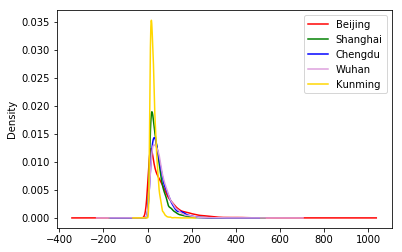

In [13]:
# PM2.5 density plot
dat_PM25 = dat.loc[dat['Type'] == 'PM2.5',['Beijing','Shanghai','Chengdu','Wuhan','Kunming']]
dat_PM25[['Beijing','Shanghai','Chengdu','Wuhan','Kunming']].plot(kind='kde',color = ['r','g','b','plum','gold'])

The density plot presents the distribution of PM2.5 for five cities. It can tell that Beijing has the largest range of PM2.5, which means that the variance of PM2.5 is the highest. Shanghai and Kunming have more uniform density distribution of PM2.5 and the fluctuations are more stable. 

It finds that Beijing has worse air quality based on the above analysis. Therefore, we explore the relationship between AQI and PM2.5 in Beijing.

Text(0,0.5,'Aiq Quality Index')

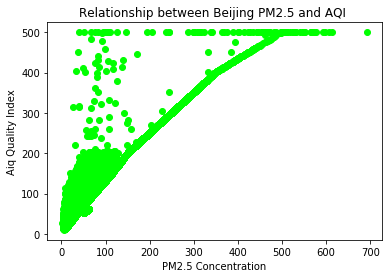

In [14]:
plt.scatter(dat_PM25['Beijing'], dat_AQI['Beijing'], color='lime')
plt.title('Relationship between Beijing PM2.5 and AQI ')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Aiq Quality Index')

<font size=4>4.4 Correlationship analysis

In [15]:
data = pd.read_csv('2015.csv')
data['datetime']=data.Year.apply(str)+'-'+data.Month.apply(str)+'-'+data.Day.apply(str)+' '+data.Hour.apply(str)+':00:00' 
sub_dt = data[['datetime', 'Type', 'Beijing','Shanghai','Chengdu','Wuhan','Kunming']].copy()

In [97]:
# Make a pivot table 
sub_tt = sub_dt.pivot('datetime', 'Type')
# Use the pivot table generated for correlationship analysis
# Apply Pearson method for correlationship analysis
sub_tt.corr(method='pearson')

value                                                    \
Type                  AQI        CO    CO_24h       NO2   NO2_24h        O3   
      Type                                                                    
value AQI        1.000000  0.051797  0.020741  0.697454  0.679132 -0.090676   
      CO         0.051797  1.000000  0.995616  0.181795  0.186180 -0.045103   
      CO_24h     0.020741  0.995616  1.000000  0.144064  0.189855 -0.031764   
      NO2        0.697454  0.181795  0.144064  1.000000  0.753518 -0.497685   
      NO2_24h    0.679132  0.186180  0.189855  0.753518  1.000000 -0.307046   
      O3        -0.090676 -0.045103 -0.031764 -0.497685 -0.307046  1.000000   
      O3_24h    -0.043406 -0.139272 -0.138168 -0.295268 -0.328508  0.678642   
      O3_8h     -0.092810 -0.046950 -0.038371 -0.395014 -0.362147  0.811644   
      O3_8h_24h -0.072727 -0.123842 -0.123822 -0.308957 -0.376960  0.654129   
      PM10       0.879120  0.049812  0.020950  0.653134  0.609676 -0.099004   
      PM10_24h   0.728553  0.027429  0.027595  0.491287  0.652699 -0.063839   
      PM2.5      0.955760  0.105807  0.071696  0.760253  0.717379 -0.183532   
      PM2.5_24h  0.772510  0.077946  0.090771  0.549698  0.810281 -0.148575   
      SO2        0.449391  0.441571  0.419095  0.592043  0.557116 -0.197643   
      SO2_24h    0.416637  0.475232  0.477567  0.519106  0.675058 -0.224389   

                                                                             \
Type               O3_24h     O3_8h O3_8h_24h      PM10  PM10_24h     PM2.5   
      Type                                                                    
value AQI       -0.043406 -0.092810 -0.072727  0.879120  0.728553  0.955760   
      CO        -0.139272 -0.046950 -0.123842  0.049812  0.027429  0.105807   
      CO_24h    -0.138168 -0.038371 -0.123822  0.020950  0.027595  0.071696   
      NO2       -0.295268 -0.395014 -0.308957  0.653134  0.491287  0.760253   
      NO2_24h   -0.328508 -0.362147 -0.376960  0.609676  0.652699  0.717379   
      O3         0.678642  0.811644  0.654129 -0.099004 -0.063839 -0.183532   
      O3_24h     1.000000  0.754685  0.977626 -0.052403 -0.036124 -0.114788   
      O3_8h      0.754685  1.000000  0.764143 -0.081793 -0.069172 -0.198069   
      O3_8h_24h  0.977626  0.764143  1.000000 -0.071679 -0.056492 -0.142922   
      PM10      -0.052403 -0.081793 -0.071679  1.000000  0.798418  0.809915   
      PM10_24h  -0.036124 -0.069172 -0.056492  0.798418  1.000000  0.684424   
      PM2.5     -0.114788 -0.198069 -0.142922  0.809915  0.684424  1.000000   
      PM2.5_24h -0.124576 -0.175799 -0.156852  0.631454  0.774799  0.799975   
      SO2       -0.297821 -0.258229 -0.301984  0.429418  0.320546  0.481380   
      SO2_24h   -0.325700 -0.258913 -0.334050  0.392982  0.427959  0.444472   

                                               
Type            PM2.5_24h       SO2   SO2_24h  
      Type                                     
value AQI        0.772510  0.449391  0.416637  
      CO         0.077946  0.441571  0.475232  
      CO_24h     0.090771  0.419095  0.477567  
      NO2        0.549698  0.592043  0.519106  
      NO2_24h    0.810281  0.557116  0.675058  
      O3        -0.148575 -0.197643 -0.224389  
      O3_24h    -0.124576 -0.297821 -0.325700  
      O3_8h     -0.175799 -0.258229 -0.258913  
      O3_8h_24h -0.156852 -0.301984 -0.334050  
      PM10       0.631454  0.429418  0.392982  
      PM10_24h   0.774799  0.320546  0.427959  
      PM2.5      0.799975  0.481380  0.444472  
      PM2.5_24h  1.000000  0.343308  0.487428  
      SO2        0.343308  1.000000  0.838853  
      SO2_24h    0.487428  0.838853  1.000000

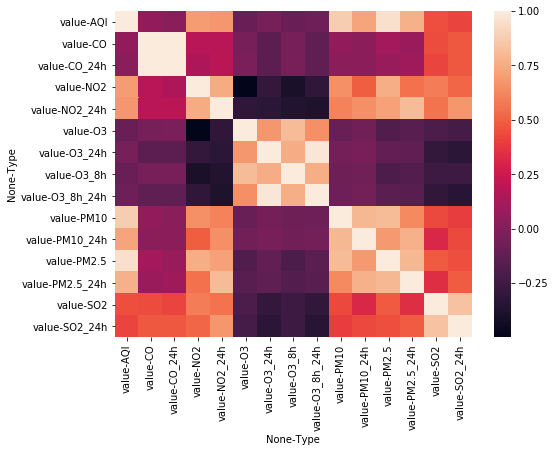

In [23]:
# Heatmap for correlationship analysis
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(sub_tt.corr()) 

Based on the correlationship table and heatmap, we can see that AQI and PM2.5,PM10, NO2 are highly correlated. Their correlation coefficient are above 0.6 from the table.

<font size=4>4.5 Principal component analysis 

In [71]:
n=['AQI', 'PM2.5', 'PM2.5_24h', 'PM10', 'PM10_24h', 'SO2', 'SO2_24h','NO2', 'NO2_24h', 'O3','O3_24h','O3_8h', 'O3_8h_24h', 'CO', 'CO_24h']
for i in range(len(n)):
    m[i]=sub_tt['value'][n[i]]  

In [81]:
frames=[m[1],m[2],m[3],m[4],m[5],m[6],m[7],m[8],m[9],m[10],m[11],m[12],m[13],m[14]]
factordata = pd.concat(frames,axis=1)
factordata.head()

,PM2.5,PM2.5_24h,PM10,PM10_24h,SO2,SO2_24h,NO2,NO2_24h,O3,O3_24h,O3_8h,O3_8h_24h,CO,CO_24h
datetime,,,,,,,,,,,,,,
2015-1-10 0:00:00,219.0,74.0,279.0,110.0,87.0,33.0,108.0,62.0,10.0,65.0,18.0,55.0,3.008,1.501
2015-1-10 10:00:00,155.0,113.0,190.0,129.0,64.0,46.0,98.0,73.0,9.0,65.0,8.0,55.0,4.333,2.200
2015-1-10 11:00:00,153.0,119.0,171.0,123.0,61.0,48.0,112.0,76.0,11.0,65.0,8.0,55.0,4.025,2.346
2015-1-10 12:00:00,139.0,124.0,175.0,127.0,53.0,50.0,111.0,80.0,19.0,65.0,9.0,55.0,3.367,2.468
2015-1-10 13:00:00,122.0,129.0,141.0,144.0,50.0,51.0,104.0,84.0,27.0,65.0,12.0,55.0,2.650,2.562


Text(0,0.5,'AQI')

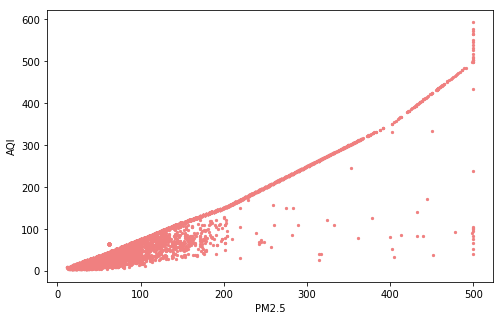

In [115]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(m[0], m[1], color='lightcoral',s=5)
plt.xlabel('PM2.5')
plt.ylabel('AQI')

According to the correlation table, AQI and PM2.5 are highly correlated. Therefore, we try to draw their relationship using scatter plot. As we can see in this picture, AQI increase with respect to the PM2.5

In [83]:
# Conduct Principal Component Analsysis for dimension reduction 
# Normalize the datasets
from sklearn.decomposition import PCA
data_norm = scale(factordata)
pd.DataFrame(data_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,8188.000000,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03,8.188000e+03
mean,0.000000,-2.776913e-17,5.553827e-17,-1.249611e-16,-5.553827e-17,-5.553827e-17,5.553827e-17,-5.553827e-17,-5.553827e-17,5.553827e-17,5.553827e-17,5.553827e-17,6.942284e-18,-3.471142e-18
std,1.000061,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-0.960171,-1.034896e+00,-1.082202e+00,-1.244273e+00,-6.849177e-01,-7.572379e-01,-1.532484e+00,-1.615705e+00,-1.034085e+00,-1.523990e+00,-1.140338e+00,-1.495078e+00,-2.711098e-01,-2.614933e-01
25%,-0.720738,-7.093640e-01,-6.652865e-01,-6.341767e-01,-6.849177e-01,-6.902397e-01,-7.666858e-01,-7.007311e-01,-7.765903e-01,-7.433884e-01,-7.788140e-01,-7.627097e-01,-2.181696e-01,-2.061360e-01
50%,-0.292278,-2.847576e-01,-3.251714e-01,-2.782872e-01,-4.434304e-01,-3.552489e-01,-2.097417e-01,-2.432440e-01,-2.432081e-01,-2.670891e-01,-2.164441e-01,-1.981760e-01,-1.714969e-01,-1.645511e-01
75%,0.350412,3.804590e-01,3.879730e-01,3.953607e-01,2.206595e-01,1.807364e-01,5.908655e-01,5.053712e-01,4.005291e-01,6.590484e-01,4.463490e-01,5.952227e-01,-8.148518e-02,-8.589410e-02
max,6.474868,5.815421e+00,9.834394e+00,6.648847e+00,7.827508e+00,4.803609e+00,4.315430e+00,4.123678e+00,4.869904e+00,3.027314e+00,4.463277e+00,2.807584e+00,8.060823e+00,8.083348e+00


After the normalization, we find 14 components and therefore conduct 14 components first.

In [84]:
# Conduct 14 components analysis 
# Select the number of components
pca1 = PCA(n_components=14)

# Fit the PCA model
pca1.fit(data_norm)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
print(var1)

[  42.99   63.99   79.96   85.04   89.71   92.97   95.44   97.09   98.3
   99.08   99.61   99.88  100.01  100.02]


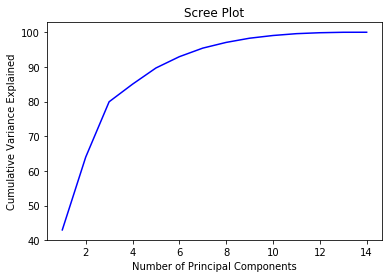

In [116]:
# Scree Plot
var1 = pd.DataFrame(var1, index=np.arange(1,15))
plt.plot(var1,color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

In order to achieve 90% cumulative variance explained, we select 6 components.
From the above plot, we can see that if we choose a 6-component solution, the explained variance would be > 90%. That is to say, 6 orthogonal (uncorrelated) components will be able to keep more than 90% variance of the 14 variables in the original dataset. This would be a good solution. Now, let's do the PCA with 6 components.

The choice of the number of principal components is determined by the analyst. In order to further reduce the number of components, you can choose for example a 2-component solution, which can keep over 60% of variance in the original dataset.

In [90]:
# Conduct 6 components analysis
# Select the number of components
pca6 = PCA(n_components=6)
pca6.fit(data_norm)
data_pca6 = pca6.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca6 = pd.DataFrame(data_pca6)
data_pca6.columns = ["PC"+str(i) for i in range(1,7)]

# Show the head of the DataFrame
data_pca6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.418449,-0.075646,0.370965,3.096328,-1.352830,1.466673
1,4.106605,-0.423539,0.509473,2.351254,-0.407685,0.092659
2,4.231962,-0.440020,0.479536,2.387740,-0.555473,-0.208809
3,4.126316,-0.358613,0.373400,2.156929,-0.334476,-0.349225
4,3.921032,-0.347646,0.382082,2.051559,0.092772,-0.639924


In [93]:
# Conduct 2 components analysis
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,4.418449,-0.075646
1,4.106605,-0.423539
2,4.231962,-0.440020
3,4.126316,-0.358613
4,3.921032,-0.347646
